In [39]:
from analysis import get_segs
import os
flag = "it_0_dp_10_nb_10_sd_1015_pt_10.000000"

sub_dataset = "scenenet_v2_taugh"

def one_model(model_name,flag,seg_type):
    floder = "D:/WorkData/ipsr_explore/out/{}/{}/graph_ipsr/lg_seg/".format(flag,model_name)
    # 检查文件夹是否存在
    if not os.path.exists(floder):
        print("floder not exist!")
        return None
    segs = get_segs(floder,seg_type)
    return segs

model_name_list = os.listdir(("D:\WorkData\ipsr_explore\input/{}".format(sub_dataset)))
model_name_list = [".".join(model_name.split(".")[0:-1]) for model_name in model_name_list if model_name.endswith(".ply")]

segss = []
for model_name in model_name_list:
    segs = one_model(model_name,flag,"res")
    if segs is not None:
        segss.append(segs)
    print(model_name)
print("done")



    
    

scene0000_00_vh_clean_2
scene0004_00_vh_clean_2
scene0010_00_vh_clean_2
scene0018_00_vh_clean_2
scene0020_00_vh_clean_2
scene0037_00_vh_clean_2
scene0038_00_vh_clean_2
floder not exist!
scene0054_00_vh_clean_2
done


In [40]:
allsegs = []
for segs in segss:
    allsegs.extend(segs)
print(len(allsegs))
segs = allsegs

1049


Text(0, 0.5, 'self_interaction')

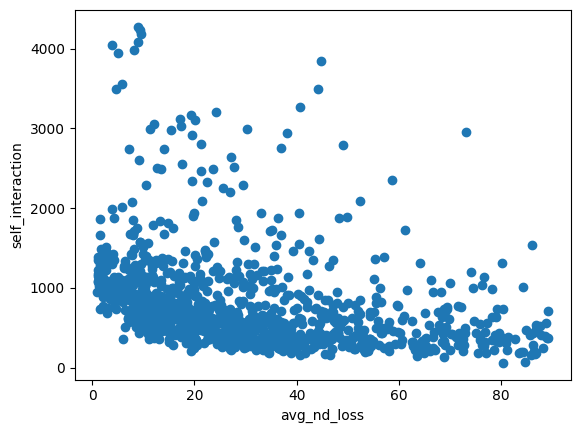

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import field_utils
metric_name = "avg_nd_loss"

y = [field_utils.self_interaction(s.nxyz) for s in segs]
x = [s.metric[metric_name] for s in segs]
id = [s.id for s in segs]


# 散点图 
plt.scatter(x, y)
plt.xlabel(metric_name)
plt.ylabel('self_interaction')
# # 在(x,y)处标注id
# for i in range(len(id)):
#     plt.text(x[i], y[i], id[i])